In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras plotly streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.9 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [ ]:
df = pd.read_csv("/var/Banglore_traffic_Dataset.csv")
print("Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully
Shape: (8936, 16)


,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance    

In [ ]:
print(" Checking Missing Values:")
print(df.isnull().sum())

 Checking Missing Values:
Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-2986283675.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2986283675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.columns


Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


df = pd.read_csv("/var/Banglore_traffic_Dataset.csv")


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


target_column = 'Congestion Level'


X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Feature Importance:\n", importances)



Mean Absolute Error: 2.8488
R² Score: 0.9653

 Feature Importance:
 Environmental Impact                  0.532576
Traffic Volume                        0.432491
Road Capacity Utilization             0.006654
Pedestrian and Cyclist Count          0.003637
Parking Usage                         0.003499
Public Transport Usage                0.003379
Average Speed                         0.003309
Traffic Signal Compliance             0.003024
Date                                  0.003000
Incident Reports                      0.002538
Travel Time Index                     0.002285
Road/Intersection Name                0.001554
Area Name                             0.000993
Weather Conditions                    0.000820
Roadwork and Construction Activity    0.000243
dtype: float64


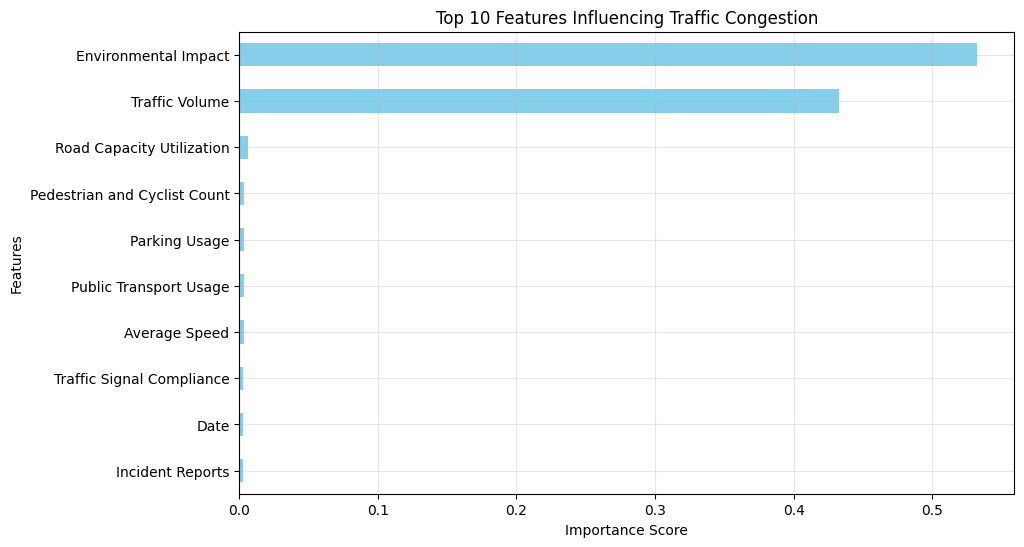

In [ ]:
import matplotlib.pyplot as plt


top_features = importances.head(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Traffic Congestion")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(alpha=0.3)
plt.show()


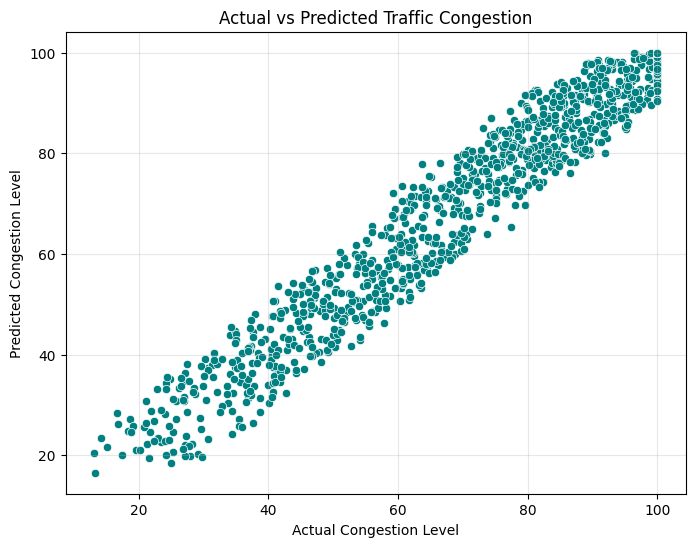

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Congestion Level")
plt.ylabel("Predicted Congestion Level")
plt.title("Actual vs Predicted Traffic Congestion")
plt.grid(alpha=0.3)
plt.show()


In [ ]:

sample = X_test.iloc[[0]]
predicted_congestion = model.predict(sample)[0]

print(f" Predicted Congestion Level for sample: {predicted_congestion:.2f}")


 Predicted Congestion Level for sample: 100.00


future - streamlit

In [ ]:
import joblib


joblib.dump(model, "traffic_congestion_model.pkl")
print(" Model saved successfully as 'traffic_congestion_model.pkl'")


 Model saved successfully as 'traffic_congestion_model.pkl'
